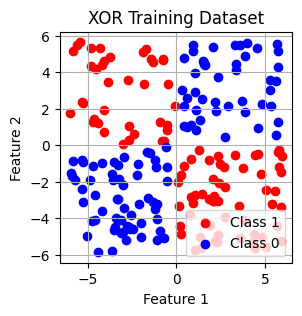

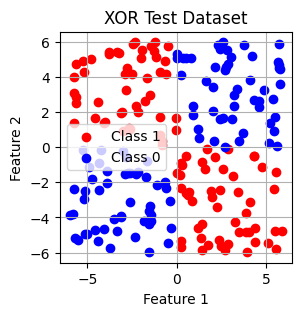

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generate XOR dataset
np.random.seed(0)
X = np.random.uniform(low=-6, high=6, size=(400, 2))
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# Plot training dataset
plt.figure(figsize=(3,3))
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color='red', label='Class 1')
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], color='blue', label='Class 0')
plt.title('XOR Training Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# Plot test dataset
plt.figure(figsize=(3,3))
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color='red', label='Class 1')
plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], color='blue', label='Class 0')
plt.title('XOR Test Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
# Define a function to plot decision surface
def plot_decision_surface(model, X, y, title):
    plt.figure(figsize=(4, 4))

    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

    # Plot decision surface
    x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))
    Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.3)

    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title(title)
    plt.show()

MLP Training Accuracy: 1.0
MLP Test Accuracy: 0.97


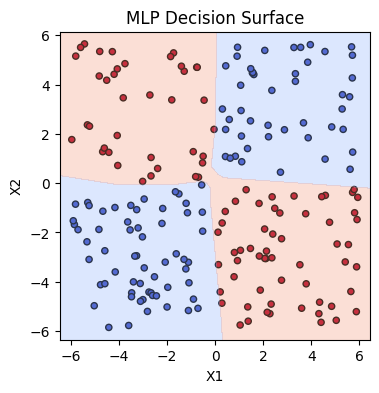

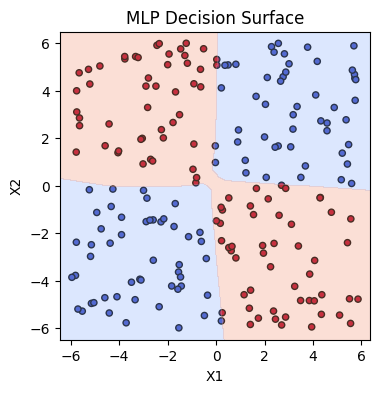

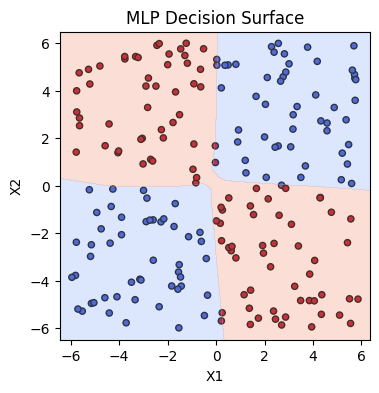

In [28]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 1. MLP
mlp = MLPClassifier(hidden_layer_sizes=(5,3,2,2), max_iter=100000, random_state=0)
mlp.fit(X_train, y_train)
print("MLP Training Accuracy:", mlp.score(X_train, y_train))
print("MLP Test Accuracy:", mlp.score(X_test, y_test))
plot_decision_surface(mlp, X_train, y_train, "MLP Decision Surface")
# Predict on the test dataset
y_pred = mlp.predict(X_test)
plot_decision_surface(mlp, X_test, y_pred, "MLP Decision Surface")
plot_decision_surface(mlp, X_test, y_test, "MLP Decision Surface")

MLP with L1 Regularization (alpha=0.1):
Training Accuracy: 0.995
Test Accuracy: 0.985


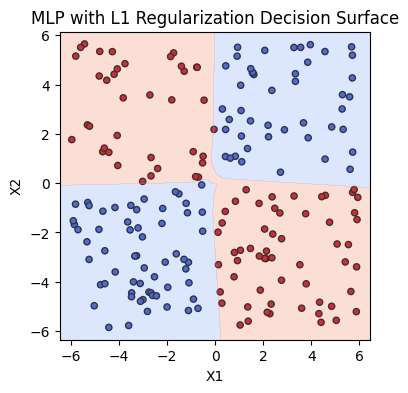

In [30]:
# 2. MLP with L1 regularization
best_alpha_l1 = None
best_score_l1 = -1
for alpha in [0.0001, 0.001, 0.01, 0.1]:
    mlp_l1 = MLPClassifier(hidden_layer_sizes=(5,3,2,2), max_iter=100000, random_state=0, alpha=alpha, solver='adam', activation='relu')
    mlp_l1.fit(X_train, y_train)
    score = mlp_l1.score(X_test, y_test)
    if score > best_score_l1:
        best_score_l1 = score
        best_alpha_l1 = alpha

mlp_l1 = MLPClassifier(hidden_layer_sizes=(5,3,2,2), max_iter=100000, random_state=0, alpha=best_alpha_l1, solver='adam', activation='relu')
mlp_l1.fit(X_train, y_train)
print("MLP with L1 Regularization (alpha={}):".format(best_alpha_l1))
print("Training Accuracy:", mlp_l1.score(X_train, y_train))
print("Test Accuracy:", mlp_l1.score(X_test, y_test))
plot_decision_surface(mlp_l1, X_train, y_train, "MLP with L1 Regularization Decision Surface")

MLP with L2 Regularization (alpha=0.001):
Training Accuracy: 1.0
Test Accuracy: 0.995


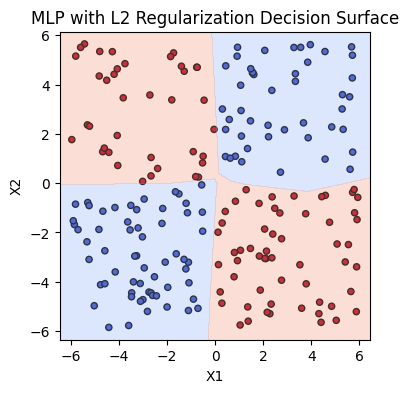

In [31]:
# 3. MLP with L2 regularization
best_alpha_l2 = None
best_score_l2 = -1
for alpha in [0.0001, 0.001, 0.01, 0.1]:
    mlp_l2 = MLPClassifier(hidden_layer_sizes=(5,3,3,2), max_iter=100000, random_state=0, alpha=alpha, solver='adam', activation='relu')
    mlp_l2.fit(X_train, y_train)
    score = mlp_l2.score(X_test, y_test)
    if score > best_score_l2:
        best_score_l2 = score
        best_alpha_l2 = alpha

mlp_l2 = MLPClassifier(hidden_layer_sizes=(5,3,3,2), max_iter=100000, random_state=0, alpha=best_alpha_l2, solver='adam', activation='relu')
mlp_l2.fit(X_train, y_train)
print("MLP with L2 Regularization (alpha={}):".format(best_alpha_l2))
print("Training Accuracy:", mlp_l2.score(X_train, y_train))
print("Test Accuracy:", mlp_l2.score(X_test, y_test))
plot_decision_surface(mlp_l2, X_train, y_train, "MLP with L2 Regularization Decision Surface")

Logistic Regression with Polynomial Features:
Training Accuracy: 0.995
Test Accuracy: 0.97


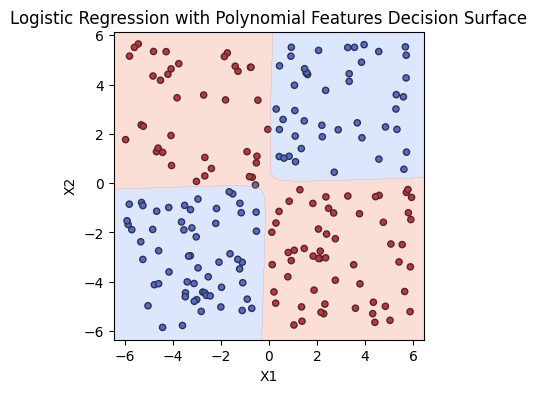

In [19]:
# 4. Logistic Regression with Polynomial Features
poly_model = make_pipeline(PolynomialFeatures(degree=2), LogisticRegression())
poly_model.fit(X_train, y_train)
print("Logistic Regression with Polynomial Features:")
print("Training Accuracy:", poly_model.score(X_train, y_train))
print("Test Accuracy:", poly_model.score(X_test, y_test))
plot_decision_surface(poly_model, X_train, y_train, "Logistic Regression with Polynomial Features Decision Surface")

Conclusion:
for MLP, test accuracy=0.97;
for MLP with L1, test accuracy=0.985;
for MLP with L2, test accuracy=0.995

MLP: The MLP model captures the nonlinear nature of the XOR dataset well, with decision boundaries that effectively separate the classes.

MLP with L1 regularization: L1 regularization adds sparsity to the model by penalizing the absolute values of the coefficients. The decision surface appears similar to mlp model but may have slightly smoother boundaries due to the regularization effect.

MLP with L2 regularization: L2 regularization penalizes the squares magnitudes of the coefficients, encouraging small weights in the model. The decision surface appears similar to mlp model but may exhibit smoother boundaries compared to the MLP with L1 regularization.

Logistic Regression with Additional Features: Adding polynomial features to logistic regression allows it to capture more complex decision boundaries. The decision surface is smoother compared to the MLP models, but it effectively separates the classes, demonstrating the model's ability to capture the XOR function's shape.

all above models captured the XOR function's shape well.

